In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import requests
from urllib.request import urlopen
import lxml.html
import time
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import csv
from PIL import Image
import random

base_url = 'https://finance.naver.com/item/board.nhn?code='

In [19]:
def naver_crawler(acode, page):
    headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3)'}
    total_dt = pd.DataFrame([])
    
    n_ = 0
    for page in range(1, page):
        
        n_ += 1
        if (n_ % 10 == 0):
            print('================== Page ' + str(page) + ' is done ==================')
        url = "https://finance.naver.com/item/board.nhn?code=%s&page=%s" % (str(acode), str(page))

        result = requests.get(url, headers = headers)
        bs_obj = BeautifulSoup(result.content, "html.parser")
        table = bs_obj.find('table', {'class' : 'type2'})
        tt = table.select('tbody > tr')

        for i in range(2, len(tt)):
            if len(tt[i].select('td > span')) > 0:
              # print(i)
              
              title = tt[i].select('td.title > a')[0]['title']
              writer = tt[i].select('td.p11')[0].text.replace('\t', '').replace('\n', '')
              date = tt[i].select('td > span')[0].text
              
              table = pd.DataFrame({ 
                                    
                                    '제목' : [title],
                                    '글쓴이' : [writer],
                                    '날짜' : [date]
                                    })
              total_dt = total_dt.append(table)
    
    return total_dt

In [20]:
data = naver_crawler('038460', 10)
data

,제목,글쓴이,날짜
0,내가말한거맞지? 다들먹었지?,ekdl****,2022.01.28 11:17
0,광고쟁이들 많이출현하면 오른다,chlr****,2022.01.28 11:14
0,모르고 지나가지마라,mmx4****,2022.01.28 11:14
0,지금 중대본 발표한다,ente****,2022.01.28 11:06
0,■■휴마시스 쓰레기들 꺼져라 니네 개판 만든다■■,chh6****,2022.01.28 11:06
...,...,...,...
0,주식 20년차고수다 대피해라,zhej****,2022.01.27 15:05
0,뉴스 언제 나와?,yuri****,2022.01.27 14:56
0,뭔가달라,ses0****,2022.01.27 14:52
0,야 이거 쎄게 가겠는데....,yuri****,2022.01.27 14:48


In [21]:
text =  ' '.join(data['제목'].tolist())
text

'내가말한거맞지? 다들먹었지? 광고쟁이들  많이출현하면 오른다 모르고 지나가지마라 지금 중대본 발표한다 ■■휴마시스 쓰레기들 꺼져라 니네 개판 만든다■■ 아니 뭐해 동호회들 어제 휴마사놓고 여기서 안티 찐카들  휴마시스는 상한가 가면   역시 여긴 아니네..휴마로 탔어야 했는데.. ?꼬리 나온 거 척 보면 몰러? 주인공은 2차 av 얼마임? 15프로만 올라갔으면 무조건   올라간다본다 나는 제입성 Sv인베는 창투사. .■ 필로시스헬스케어 [국내판매] 수출용 + 국내용 / https://www.philosys.com/product/covid/sal 영차영차~ 용느님믿습니ㅏㄷ 아멘 ㅅㅅ 2월 3일부터 전국보건소에 진단키트  없네요  헉 가즈아 ■■바이오스마트 주주필독글-퍼온글■■ 진퉁은 휴마시스! 핵심은 신속PCR광범위도입이야 ㅋㅋ 단기 상승끝이면 또 5짜다 안전 하게 상따를 해라 개미떨?으니 찬티글은 달콤하다 그라나 계좌는 깡통찬다  재수없어 음봉 일등주는 휴마시스다 바스는 삼등주다 난 연기금 따라 할련다.. ●●●속아서 명절에 한강 가지마세요●●● 아 진짜 개짱나네ㅡㅡ 지금 필요한건 거래량 이세키도 지랄하네... 올라가자 ㅎㅎ 진카 휴마와 주식인생 뭐 있나 진카는 휴마시스.... 우리도 휴마시스 따라 가즈아~~~ 오늘이나 개장일에 한번 더 쳐올린다 이건 70%이상은 봐야한다 오늘은 인간적으로 시총 너무 낮은거 아님? 저평가 확신! ●●●바이오스마트 코란-퍼온글●●●●● ●●●휴마시스 진짜, 바스는 가짜●●● 오늘 700만 감사합니다 감각도 없는 일인.. ●●●가짜 진짜 잘 구분하세요●●● ●●●그저께 팔았나봐 ㅋㅋ ●●● ●●●물리면  이번명절 한강행●●● 한강에서 유람선이 타자~ 이제 털릴사람들 다털렸나? 아  괜히 들어갔다가 쳐물렸네.. ●●●뉴스에 팔아라, 여기는 가짜다●●● 요기서 강하게 쳐 올려야 다음vi 목표가 작전치는넘들 여긴 진짜 조심해야 합니다.사짜  ●●●물리면 3년 개고생●●● ●●●사채마트는 가짜다●●● 코스피, 코스닥 하락전환 어제처럼 

In [22]:
from konlpy.tag import Okt
from collections import Counter

korean_stopwords_path = "../Library/korean_stopwords.txt"
nouns_tagger = Okt()
with open(korean_stopwords_path, encoding='utf-8') as f: # 불용어 텍스트 파일을 열어 f로 치환
    stopwords = f.readlines() # 파일로부터 불용어를 한 줄씩 read
stopwords = [x.strip() for x in stopwords] # 리스트 생성
financial_stopwords = ['주식']
for stopword in financial_stopwords:
    stopwords.append(stopword)

In [23]:
nouns = nouns_tagger.nouns(text)
text_t = Counter(nouns)

text_t_remove = Counter({x: text_t[x] for x in text_t if len(x) > 1})
text_t_remove = Counter({x: text_t_remove[x] for x in text_t if x not in stopwords})
print(text_t_remove)

Counter({'키트': 12, '바이오': 11, '스마트': 11, '진단': 10, '마시스': 8, '상한': 8, '오늘': 6, '개미': 5, '가짜': 5, '검사': 5, '어제': 4, '퍼온글': 4, '진짜': 4, '내일': 4, '거래': 3, '진카': 3, '이건': 3, '물리': 3, '뉴스': 3, '사채': 3, '마트': 3, '시작': 3, '대란': 3, '출현': 2, '지금': 2, '가면': 2, '역시': 2, '수출': 2, '내용': 2, '전국': 2, '가즈': 2, '신속': 2, '도입': 2, '상승': 2, '등주': 2, '바스': 2, '명절': 2, '한강': 2, '평가': 2, '하락': 2, '전환': 2, '외국인': 2, '품절': 2, '오미크론': 2, '대기': 2, '프로그램': 2, '성경': 2, '항원': 2, '진자': 2, '하루': 2, '예상': 2, '속보': 2, '시외': 2, '조정': 2, '코로나': 2, '우려': 2, '통화': 2, '대박': 2, '자가': 2, '광고': 1, '대본': 1, '발표': 1, '쓰레기': 1, '개판': 1, '동호회': 1, '마사': 1, '안티': 1, '마로': 1, '꼬리': 1, '주인공': 1, '마임': 1, '프로': 1, '무조건': 1, '입성': 1, '투사': 1, '필로': 1, '시스': 1, '스케': 1, '국내': 1, '판매': 1, '느님': 1, '아멘': 1, '보건소': 1, '주주': 1, '필독': 1, '진퉁': 1, '핵심': 1, '광범위': 1, '단기': 1, '안전': 1, '찬티글': 1, '라나': 1, '계좌': 1, '깡통': 1, '음봉': 1, '연기금': 1, '가지': 1, '키도': 1, '지랄': 1, '인생': 1, '오늘이': 1, '개장': 1, '한번': 1, '올린다': 1, '이상은': 1, '인간': 1, '확신': 1, '코란

In [24]:
textwords = WordCloud().generate(text)
textwords.words_

{'진단키트': 1.0,
 '바이오스마트': 1.0,
 '휴마시스': 0.625,
 '상한가': 0.625,
 '퍼온글': 0.5,
 '진짜': 0.5,
 '내일': 0.5,
 '어제': 0.375,
 '또': 0.375,
 '아': 0.375,
 '더': 0.375,
 '물리면': 0.375,
 '가짜다': 0.375,
 '오늘도': 0.375,
 '다': 0.375,
 '대란': 0.375,
 '지금': 0.25,
 '역시': 0.25,
 '여긴': 0.25,
 '2월': 0.25,
 '가즈아': 0.25,
 'ㅋㅋ': 0.25,
 '바스는': 0.25,
 '난': 0.25,
 '따라': 0.25,
 '거래량': 0.25,
 'ㅎㅎ': 0.25,
 '이건': 0.25,
 '오늘은': 0.25,
 '시총': 0.25,
 '가짜': 0.25,
 'ㅋㅋㅋ': 0.25,
 '이상': 0.25,
 '외국인': 0.25,
 '개미만': 0.25,
 '이거': 0.25,
 '사채마트': 0.25,
 '설지나면': 0.25,
 '오미크론': 0.25,
 '성경': 0.25,
 '일단': 0.25,
 '예상': 0.25,
 '속보': 0.25,
 '1시간만에': 0.25,
 '우려': 0.25,
 '속': 0.25,
 '한다': 0.25,
 '자가검사키트': 0.25,
 '가': 0.25,
 '없어': 0.25,
 '내가말한거맞지': 0.125,
 '다들먹었지': 0.125,
 '광고쟁이들': 0.125,
 '많이출현하면': 0.125,
 '오른다': 0.125,
 '모르고': 0.125,
 '지나가지마라': 0.125,
 '중대본': 0.125,
 '발표한다': 0.125,
 '쓰레기들': 0.125,
 '꺼져라': 0.125,
 '니네': 0.125,
 '개판': 0.125,
 '만든다': 0.125,
 '아니': 0.125,
 '뭐해': 0.125,
 '동호회들': 0.125,
 '휴마사놓고': 0.125,
 '여기서': 0.125,
 '안티': 0.125,
 '찐카

In [25]:
text

'내가말한거맞지? 다들먹었지? 광고쟁이들  많이출현하면 오른다 모르고 지나가지마라 지금 중대본 발표한다 ■■휴마시스 쓰레기들 꺼져라 니네 개판 만든다■■ 아니 뭐해 동호회들 어제 휴마사놓고 여기서 안티 찐카들  휴마시스는 상한가 가면   역시 여긴 아니네..휴마로 탔어야 했는데.. ?꼬리 나온 거 척 보면 몰러? 주인공은 2차 av 얼마임? 15프로만 올라갔으면 무조건   올라간다본다 나는 제입성 Sv인베는 창투사. .■ 필로시스헬스케어 [국내판매] 수출용 + 국내용 / https://www.philosys.com/product/covid/sal 영차영차~ 용느님믿습니ㅏㄷ 아멘 ㅅㅅ 2월 3일부터 전국보건소에 진단키트  없네요  헉 가즈아 ■■바이오스마트 주주필독글-퍼온글■■ 진퉁은 휴마시스! 핵심은 신속PCR광범위도입이야 ㅋㅋ 단기 상승끝이면 또 5짜다 안전 하게 상따를 해라 개미떨?으니 찬티글은 달콤하다 그라나 계좌는 깡통찬다  재수없어 음봉 일등주는 휴마시스다 바스는 삼등주다 난 연기금 따라 할련다.. ●●●속아서 명절에 한강 가지마세요●●● 아 진짜 개짱나네ㅡㅡ 지금 필요한건 거래량 이세키도 지랄하네... 올라가자 ㅎㅎ 진카 휴마와 주식인생 뭐 있나 진카는 휴마시스.... 우리도 휴마시스 따라 가즈아~~~ 오늘이나 개장일에 한번 더 쳐올린다 이건 70%이상은 봐야한다 오늘은 인간적으로 시총 너무 낮은거 아님? 저평가 확신! ●●●바이오스마트 코란-퍼온글●●●●● ●●●휴마시스 진짜, 바스는 가짜●●● 오늘 700만 감사합니다 감각도 없는 일인.. ●●●가짜 진짜 잘 구분하세요●●● ●●●그저께 팔았나봐 ㅋㅋ ●●● ●●●물리면  이번명절 한강행●●● 한강에서 유람선이 타자~ 이제 털릴사람들 다털렸나? 아  괜히 들어갔다가 쳐물렸네.. ●●●뉴스에 팔아라, 여기는 가짜다●●● 요기서 강하게 쳐 올려야 다음vi 목표가 작전치는넘들 여긴 진짜 조심해야 합니다.사짜  ●●●물리면 3년 개고생●●● ●●●사채마트는 가짜다●●● 코스피, 코스닥 하락전환 어제처럼 

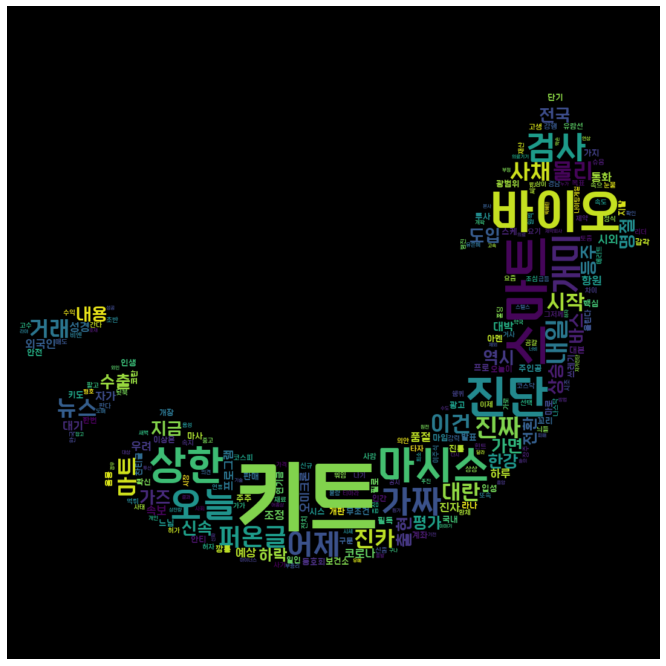

In [26]:
image_mask = np.array(Image.open("../Library/007.jpg"))
wc = WordCloud(mask=image_mask,
               font_path='../Library/EliceDigitalBaeum_Bold.ttf', 
               #background_color = 'white', 
               max_words = 1500, max_font_size = 300)
gen = wc.generate_from_frequencies(text_t_remove)

plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.savefig('../220127/StockItem.jpg')
#plt.show()

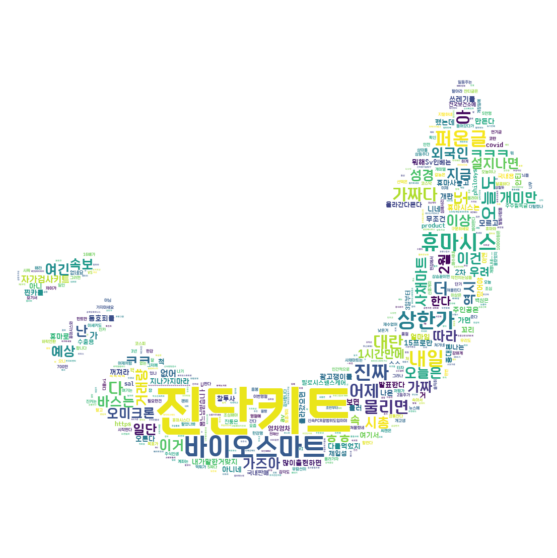

In [27]:
image_mask = np.array(Image.open("../Library/007.jpg"))
wc = WordCloud(mask=image_mask,
               font_path='../Library/EliceDigitalBaeum_Bold.ttf', 
               background_color = 'white', 
               max_words = 1500, max_font_size = 300).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()